### **Data Preprocessing**

In [ ]:
# Drop customerID column
df.drop(columns=['customerID'], inplace=True)

In [ ]:
# Convert TotalCharges to float, handling non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
# drop all null values
df = df.dropna()

In [ ]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                                         'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                         'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                                         'PaperlessBilling', 'PaymentMethod'])

# Display the encoded dataset
print(df_encoded.head())

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges Churn  gender_Female  \
0              0       1           29.85         29.85    No           True   
1              0      34           56.95       1889.50    No          False   
2              0       2           53.85        108.15   Yes          False   
3              0      45           42.30       1840.75    No          False   
4              0       2           70.70        151.65   Yes           True   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0        False       False         True           True  ...   
1         True        True        False           True  ...   
2         True        True        False           True  ...   
3         True        True        False           True  ...   
4        False        True        False           True  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                False                     True              False   
1     

In [ ]:
# check for null values
missing_values = df_encoded.isnull().sum()
missing_values

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBack

In [ ]:
# change 'Churn' into 'Yes' and 'No' before scaling
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for normalization
numerical_cols = ['tenure', 'MonthlyCharges']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the normalized dataset
print(df_encoded.head())

   SeniorCitizen    tenure  MonthlyCharges  Churn  gender_Female  Partner_No  \
0              0  0.000000        0.115423      0           True       False   
1              0  0.464789        0.385075      0          False        True   
2              0  0.014085        0.354229      1          False        True   
3              0  0.619718        0.239303      0          False        True   
4              0  0.014085        0.521891      1           True        True   

   Dependents_No  PhoneService_No  MultipleLines_No  InternetService_DSL  ...  \
0           True             True             False                 True  ...   
1           True            False              True                 True  ...   
2           True            False              True                 True  ...   
3           True             True             False                 True  ...   
4           True            False              True                False  ...   

   StreamingMovies_No  Streaming

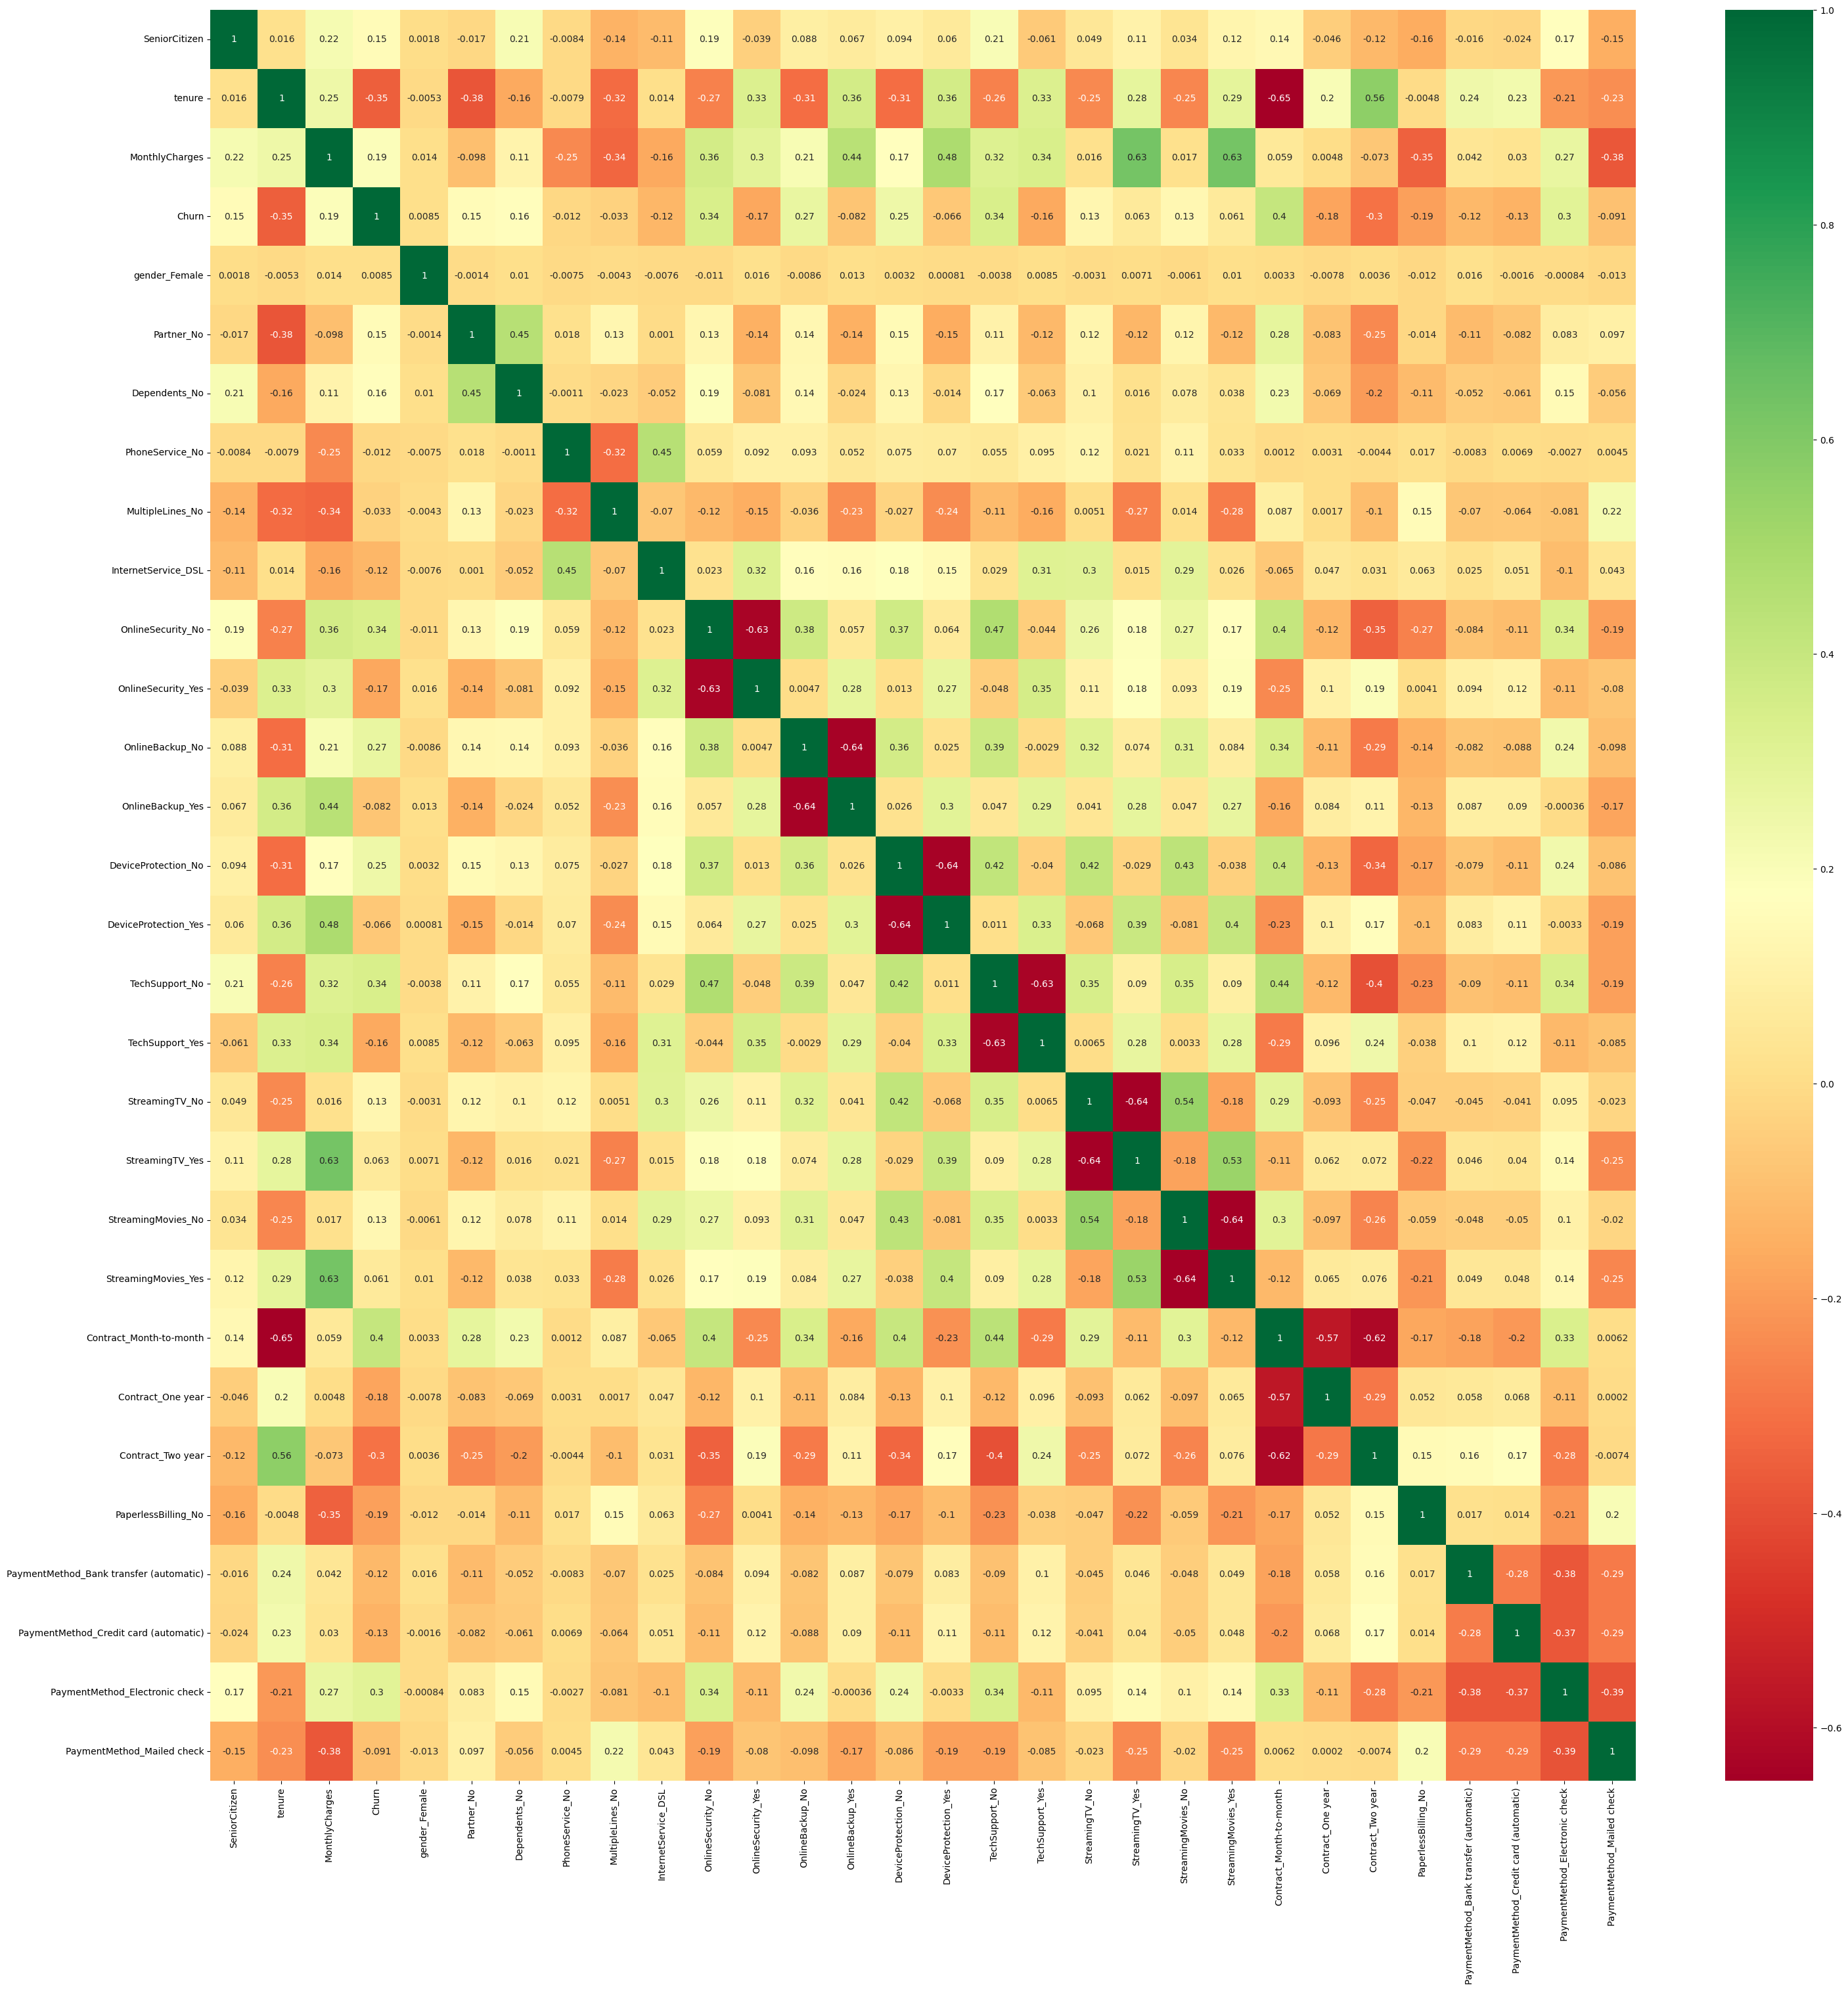

In [ ]:
# create a heatmap to visualize the correlation between columns
plt.figure(figsize=(35, 35))
sns.heatmap(df_encoded.corr(), cmap='RdYlGn', annot=True)
plt.show()

In [ ]:
# Determine threshold for multicollinearity
threshold = 0.7

In [ ]:
# Find pairs of variables with correlation coefficient above the threshold
correlation_matrix = df_encoded.corr()
highly_correlated_pairs = [(i, j) for i in range(correlation_matrix.shape[0]) for j in range(i+1, correlation_matrix.shape[1]) if abs(correlation_matrix.iloc[i, j]) > threshold]

In [ ]:
# Remove one variable from each pair of highly correlated variables
columns_to_remove = set()
for i, j in highly_correlated_pairs:
    column_i = correlation_matrix.columns[i]
    column_j = correlation_matrix.columns[j]
    # Remove the variable with higher correlation with other variables
    if column_i not in columns_to_remove:
        columns_to_remove.add(column_j)

In [ ]:
# Remove correlated columns from the DataFrame
df_encoded = df_encoded.drop(columns=columns_to_remove)

In [ ]:
# Print the DataFrame without multicollinearity
print("DataFrame without multicollinearity:")
print(df_encoded.head())

DataFrame without multicollinearity:
   SeniorCitizen    tenure  MonthlyCharges  Churn  gender_Female  Partner_No  \
0              0  0.000000        0.115423      0           True       False   
1              0  0.464789        0.385075      0          False        True   
2              0  0.014085        0.354229      1          False        True   
3              0  0.619718        0.239303      0          False        True   
4              0  0.014085        0.521891      1           True        True   

   Dependents_No  PhoneService_No  MultipleLines_No  InternetService_DSL  ...  \
0           True             True             False                 True  ...   
1           True            False              True                 True  ...   
2           True            False              True                 True  ...   
3           True             True             False                 True  ...   
4           True            False              True                False  ...

In [ ]:
df_encoded.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn', 'gender_Female',
       'Partner_No', 'Dependents_No', 'PhoneService_No', 'MultipleLines_No',
       'InternetService_DSL', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')